<a href="https://colab.research.google.com/github/Artyom995/Neiro/blob/main/Neuro_Fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обнаружение фальшивых новостей Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

задача - используя библиотеку sklearn построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (REAL） или фальшивой（FAKE).

Цели - самостоятельно изучить и применить к задаче TfidfVectorizer для извлечения признаков из текстовых данных и PassiveAggressiveClassifier.
Построить матрицу ошибок (confusion matrix). Визуализировать для заказчика результаты там, где это возможно.


In [1]:
!pip install pandas scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fake_news.csv to fake_news.csv


In [4]:
df = pd.read_csv('/content/fake_news.csv')

In [5]:
#смотрим на первые строки датасета
print(df.head())
# Проверяем на наличие пропусков
print('-------наличие пропусков---------')
print(df.isnull().sum())

print('-------классы сбалансированы или нет---------')
# Убедимся, что классы сбалансированы
print(df['label'].value_counts())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
-------наличие пропусков---------
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
-------классы сбалансированы или нет---------
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


Точность: 93.84%
1357    FAKE
2080    FAKE
2718    FAKE
812     FAKE
4886    FAKE
        ... 
1512    FAKE
57      REAL
6092    REAL
3403    REAL
292     REAL
Name: label, Length: 1267, dtype: object
Матрица:
[[587  41]
 [ 37 602]]


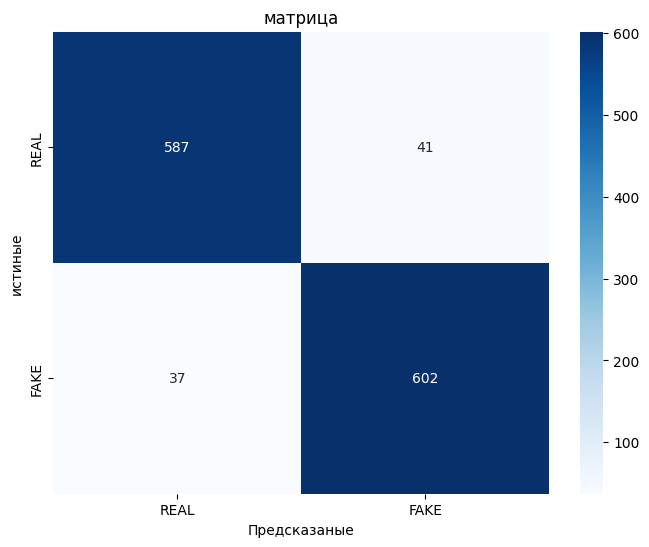

In [6]:
# Предобработка текста
X = df['text']  # столбец с текстом называется 'text'
y = df['label']  # Столбец с метками

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test_size=0.2 - 20% данных будет отведено для тестирования, 80% — для обучения

# Преобразование текста в числовые признаки
tfidf_vectorizer = TfidfVectorizer() #преобразуем текстовые данные в числовые векторы с использованием метода TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)#создает матрицу признаков.
X_test_tfidf = tfidf_vectorizer.transform(X_test) #преобразовываем тестовые данные в ту же числовую форму, что и обучающие данные.

# Обучение модели
classifier = PassiveAggressiveClassifier(max_iter=1000, random_state=42)#max_iter - максимальное количество итераций random_state=42 позволяет контролировать генерацию случайных чисел,
classifier.fit(X_train_tfidf, y_train) #обучаем модель на преобразованных обучающих данных с помощью метода fit

# Прогнозирование
y_pred = classifier.predict(X_test_tfidf)#используем обученную модель для предсказания меток

# Оценка модели
accuracy = accuracy_score(y_test, y_pred) #сравниваем предсказанные метки
print(f'Точность: {accuracy * 100:.2f}%')
print(y_test)
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица:')
print(conf_matrix)


# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.ylabel('истиные')
plt.xlabel('Предсказаные')
plt.title('матрица')
plt.show()

ROC-кривая и площадь под кривой (AUC) предоставляют важную информацию о том, насколько хорошо ваша модель распознает классы.

Высокая AUC (ближе к 1): Это указывает на то, что модель хорошо различает положительные и отрицательные классы. Чем выше AUC, тем лучше модель. AUC около 0.5: Это говорит о том, что модель не лучше случайного угадывания. Она не может эффективно различать классы. AUC ниже 0.5: Это означает, что модель работает хуже, чем случайное угадывание, и, вероятно, требует пересмотра или улучшения.

[0 0 1 ... 0 1 1]
[0 0 0 ... 1 1 1]


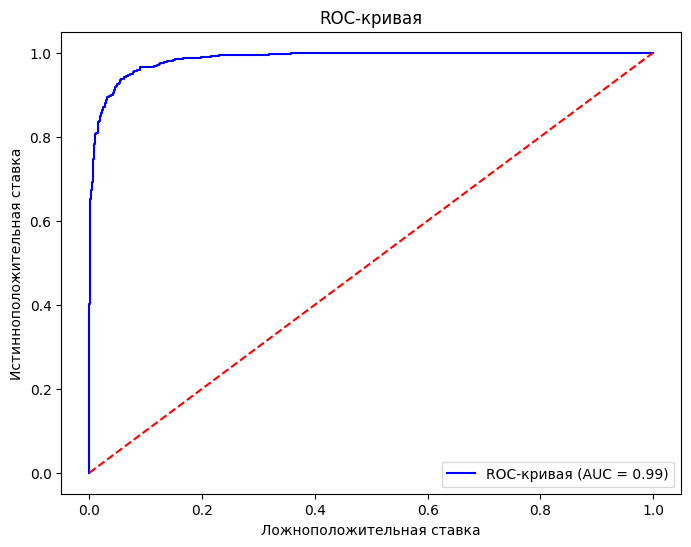

In [7]:
#Преобразование FAKE и REAL в числа (0,1)
le = LabelEncoder()
y = le.fit_transform(df['label'])
print(y)
y_test = le.transform(y_test)
print(y_test)
# Получение оценок для ROC-кривой
y_scores = classifier.decision_function(X_test_tfidf)

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Ложноположительная ставка')
plt.ylabel('Истинноположительная ставка')
plt.title('ROC-кривая')
plt.legend()
plt.show()

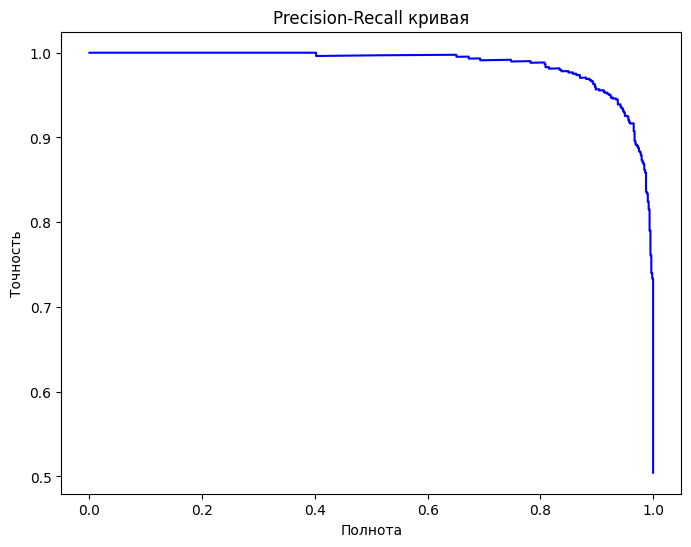

In [8]:

precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Визуализация Precision-Recall кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Precision-Recall кривая')
plt.show()